In [107]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing data
df = pd.read_csv('./USA_Housing.csv')

# displaying data to get an overview
print(df.head(3))

# displaying an information about data
print("information:")
print(df.info())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -

In [108]:
# importing necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# data preprocessing
# data cleaning

# handling missing values
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(exclude='number').columns
print(numeric_cols)
print(categorical_cols)

imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])

# Convert Categorical Features to Numerical
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
# display categorical column data after numerical conversion
print(df[categorical_cols].loc[1])

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')
Index(['Address'], dtype='object')
Address    863
Name: 1, dtype: int32


In [109]:
# determining features & target variable
print(df.columns)

X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
# display single data from X
print('X:\n',X.loc[1])

y=df['Price']
# display single data from y
print('y:\n',y.loc[1])

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')
X:
 Avg. Area Income                79248.642455
Avg. Area House Age                 6.002900
Avg. Area Number of Rooms           6.730821
Avg. Area Number of Bedrooms        3.090000
Area Population                 40173.072174
Name: 1, dtype: float64
y:
 1505890.91484695


                                       coef
Avg. Area Income                  21.617635
Avg. Area House Age           165221.119872
Avg. Area Number of Rooms     121405.376596
Avg. Area Number of Bedrooms    1318.718783
Area Population                   15.225196


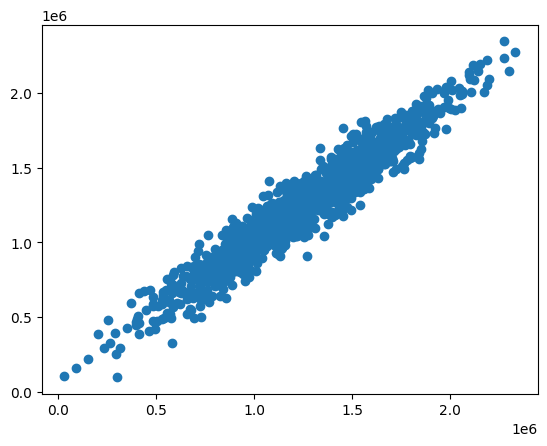

In [110]:
# importing necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# spliting the dataset to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# training the model
model= LinearRegression()
model.fit(X_train, y_train)
print(pd.DataFrame(model.coef_, X.columns, columns=['coef']))

# perdicting test data
predictions=model.predict(X_test)
plt.scatter(y_test, predictions)

In [111]:
# importing necessary libraries
from sklearn import metrics

# evaluating the model
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('R-Squared:', metrics.r2_score(y_test,predictions))
print('RSME:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 81257.55795855941
R-Squared: 0.9185060945363622
RSME: 100842.08231635048
